In [2]:
import cv2
import matplotlib.pyplot as plt
import os 
from IPython.display import display, clear_output
from tqdm.notebook import tqdm

CHECKING WHICH IS THE CAMERA INDEX

camera with index 0 found!


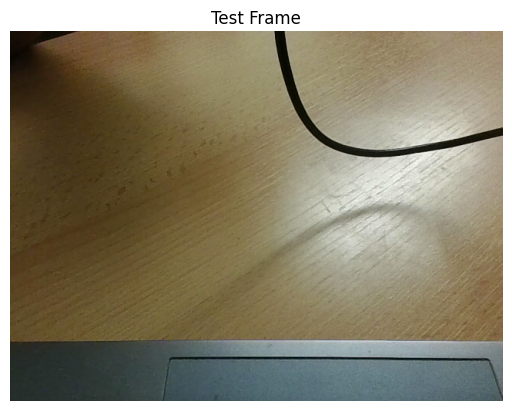

camera with index 1 found!


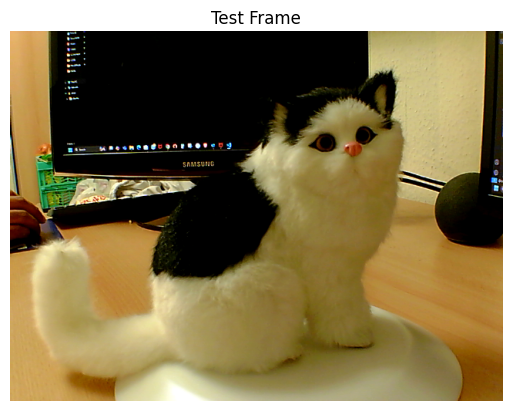

camera with index 2 not found!


In [23]:
for i in range(3):
    cam_index= i
    capture = cv2.VideoCapture(cam_index)
    if not capture.isOpened():
        print(f"camera with index {cam_index} not found!")
    else:
        print(f"camera with index {cam_index} found!")
        #warm up for a few frames
        for j in range(1):
            ret, frame= capture.read()
        ret, frame= capture.read()
        if ret and frame is not None and frame.sum() > 0:
            frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

            plt.imshow(frame_rgb)
            plt.title("Test Frame")
            plt.axis('off')
            plt.show()
        else:
            print("could not read frame")
        
        capture.release()

RECORDING A VIDEO

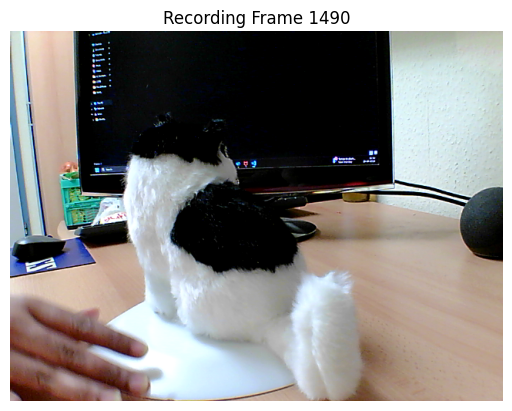

 Recording done! Video saved as 'recorded_catvideo.mp4'


In [ ]:
cam_index=1                                                                         #select the camera index based on the previous results
capture= cv2.VideoCapture(cam_index)                                                #Opens the webcam stream

print("Warming up camera................")
num_warmup_frames = 20                                                              #gives the camera time to adjust
for i in range(num_warmup_frames):
    ret, frame = capture.read()

fps=40
#get width and height of video
frame_width= int(capture.get(3))
frame_height= int(capture.get(4))

output_file= "recorded_catvideo.mp4"

fourcc = cv2.VideoWriter_fourcc(*'mp4v')  # 'mp4v' for .mp4
out = cv2.VideoWriter(output_file, fourcc, fps, (frame_width, frame_height))

num_frames_to_record = 1500
print("Recording...")

for i in tqdm(range(num_frames_to_record), desc="Recording frames"):
    ret, frame = capture.read()                                                     #if ret , frame is true
    if ret:
        out.write(frame)                                                            #Save the frame to the output video
        
        #preview every 10th frame
        if i % 10 == 0:
            frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
            plt.imshow(frame_rgb)
            plt.title(f"Recording Frame {i}")
            plt.axis('off')
            clear_output(wait=True)  
            display(plt.gcf())       
            plt.close() 
    else:
        print(f"Frame {i} not captured.")
        break

capture.release()
out.release()

print(f" Recording done! Video saved as '{output_file}'")

EXTRACTING FRAMES

In [ ]:
video_path = "recorded_catvideo.mp4"                                        #MP4 file
output_folder = "extracted_frames_jpg"
os.makedirs(output_folder, exist_ok=True)

capture = cv2.VideoCapture(video_path)                                      #opens video     
frame_num = 0
print("Extracting frames...")

while True:
    ret, frame = capture.read()
    if not ret:
        break                                                               #reached end of video
    filename = os.path.join(output_folder, f"frame_{frame_num:04d}.jpg")    #ensures zeropadding
    cv2.imwrite(filename, frame)
    frame_num += 1

capture.release()

print(f"Extracted {frame_num} frames.")
print(f"All frames saved in: {os.path.abspath(output_folder)}")

Extracting frames...
Extracted 1500 frames.
All frames saved in: c:\AAKASH\MS_NOTES\6th sem\RAML\extracted_frames_jpg
